In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [42]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:xlabel='table'>

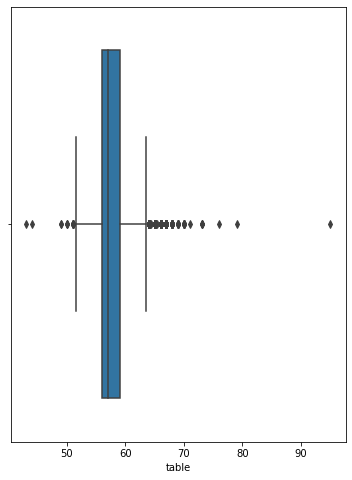

In [8]:
plt.figure(figsize =(6,8))
sns.boxplot(x = df.table)

In [10]:
df['table'].quantile(0.25)

56.0

In [11]:
Q1 = df['table'].quantile(0.25) 

In [15]:
Q3 = df['table'].quantile(0.75) 

In [16]:
Q3

59.0

In [17]:
IQR = Q3-Q1

In [18]:
IQR

3.0

In [20]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [23]:
out_low = df[df.table < lower_lim]

In [24]:
out_high = df[df.table > upper_lim]

In [28]:
df[(df.table < lower_lim)|(df.table > upper_lim)] # outlier olanlar

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,Good,H,VVS2,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,Very Good,D,VVS2,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,Fair,G,SI1,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...,...,...,...
53695,0.75,Good,E,VS2,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,Fair,H,VVS2,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,Fair,G,VS1,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34


In [30]:
df_cleaned = df[~((df.table < lower_lim)|(df.table > upper_lim))] # outlier olmayanlar
df_cleaned

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


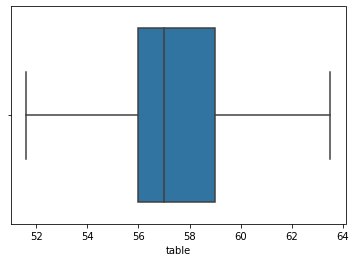

In [34]:
sns.boxplot(x = df_cleaned.table);

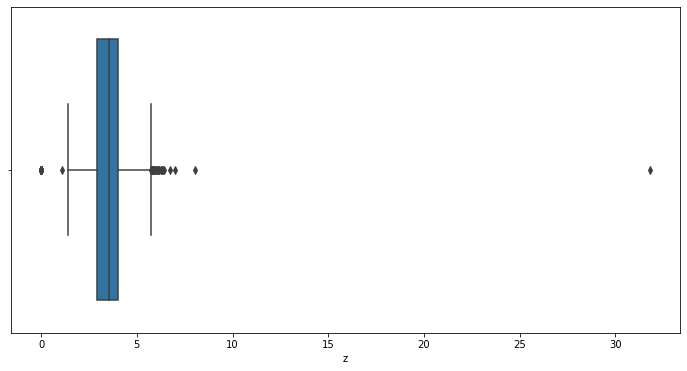

In [48]:
plt.figure(figsize = (12,6))
sns.boxplot(x = df.z);

In [49]:
Q1 = df['z'].quantile(0.25)
Q3 = df['z'].quantile(0.75)
IQR = Q3 - Q1

In [50]:
Q1, Q3, IQR

(2.91, 4.04, 1.13)

In [51]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [54]:
df_z_clean = df[~((df.z < lower_lim)|(df.z > upper_lim))]

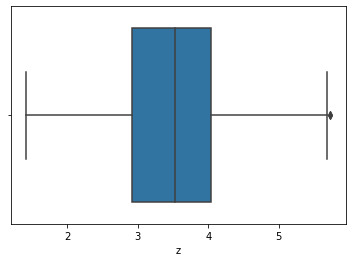

In [79]:
df_z = sns.boxplot(x = df_z_clean['z']);

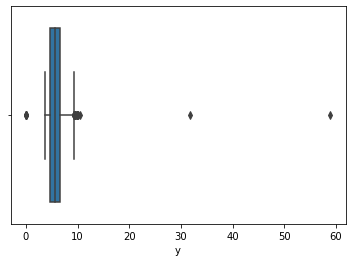

In [60]:
sns.boxplot(x = df.y);

In [61]:
Q1 = df.y.quantile(0.25)
Q3 = df.y.quantile(0.75)
IQR =Q3-Q1

In [62]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [65]:
df_y_clean = df[~((df.y < lower_lim)|(df.y > upper_lim))]

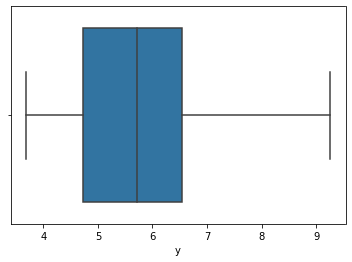

In [78]:
df_y = sns.boxplot(x = df_y_clean['y'])

In [ ]:
# rightskew yada leftskew dagilimlarda log function outlieri silmekde komek edir

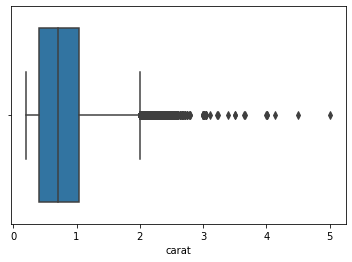

In [68]:
sns.boxplot( x = df.carat); # rightskew 

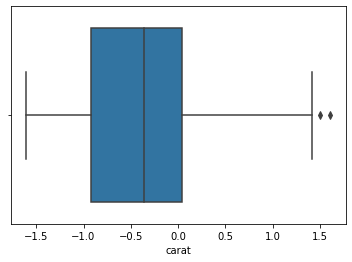

In [76]:
df_carat = sns.boxplot(x = np.log(df['carat']));

In [80]:
from scipy.stats.mstats import winsorize

<AxesSubplot:>

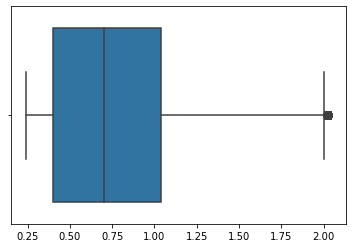

In [81]:
sns.boxplot(x = winsorize(df['carat'],(0.01, 0.02)))

C:\Users\rusla\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


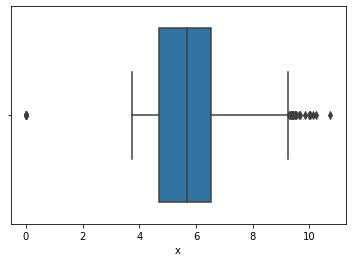

In [70]:
# winsorize method

sns.boxplot(df['x']);

In [71]:
from scipy.stats.mstats import winsorize

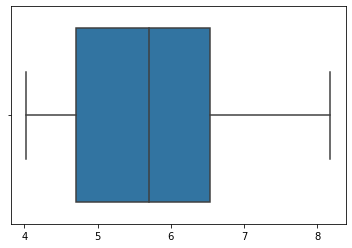

In [77]:
df_x = sns.boxplot(x = winsorize(df['x'],(0.01, 0.02)));